# Goals/questions to answer for this project (I may not be able to answer them all!)

- Which openings work best generally for certain players within certain rating ranges?

- Are there any obvious patterns related to why players may lose/win games

- Does rating impact what kind of openings players play?

- Does your oponents rating impact which opening you play?

- Do players treat playing higher rated players/lower rated players?

- Is there consequences for playing "safer" against higher rated players


Final Goal will be to construct some technical and personalized tips/advice based on this analysis

Method:

Initially I will do an explatory analysis, just getting a feel for the data, this will include:

- Analysis of openings used
- Analysis of results of games in relation to many other attributes
- Analysis of Player Ratings

- More to come!

In [ ]:
# Import important Modules
!pip install plotly
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

## Exploratory Analysis

4 Parts:
    1. Data Overview/Preview
    2. Openings Analysis
    3. Analysis of results of games
    4. Analysis of Player Ratings

### 1. Data Overview

Questions to ask:
   - What are the features and patterns of this dataset
   - What things are noticeable?
   - Do we need a bit of Preprocessing?


In [ ]:
# Load data, and print first 5 rows displaying all columns
data = pd.read_csv("games.csv")
data.head()

In [7]:
# How many Distinct Players do we have?
# Get totals from both black and white which are unique, combine them, then get unique players from that combined list

unique_white = data["white_id"].unique().tolist()
unique_black = data["black_id"].unique().tolist()
unique_white.extend(unique_black)

all_players = []
for player in unique_white:
    if player not in all_players:
        all_players.append(player)

print("Number of unique Players:", len(all_players))


Number of unique Players: 15635


Quick Note about ratings:
- Ratings in Chess are important, they obviously determine the skill of a player
- We should make sure that our dataset is a good representation of a balanced collection of players
- On Lichess.org if you follow this link https://lichess.org/stat/rating/distribution/blitz the average rating (blitz) overall is around the 1200 to 1600 mark, so if our dataset gives us an average player rating in this range, we will be happy
- Extra Info: )
     - Grandmasters tend to have an online rating of over 2500 (Magnus Carlsen, World Champion = 3100+), so picking out               their games (if there         are any) would be very beneficial in future analysis
     - Very few break 2800 rating, so we can't expect many players of that level in this dataset

Mean Rating: 1592.73
Max Rating: 2723
Min Rating: 784
Std Rating: 291.16


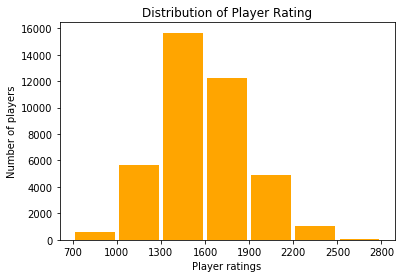

In [16]:
# Remember, rating is changing every game, and since there are plenty of games with the same players,
# a player in this dataset cannot be linked to one single rating

# lets get a measure of the distribution of the ratings of the players for each game
ratings = data["white_rating"].tolist()
b_ratings = data["black_rating"].tolist()
ratings.extend(b_ratings)

# Basic Insights into what ratings we are working with
mean_rating, max_rating, min_rating, std_rating = round(np.mean(ratings), 2), max(ratings), min(ratings), round(np.std(ratings), 2)
print("Mean Rating:", mean_rating)
print("Max Rating:", max_rating)
print("Min Rating:", min_rating)
print("Std Rating:", std_rating)

# Set up a histogram, bins start from 700 to 2800+ is a good range in general for online chess analysis)

# For the bins, bin "length" of 300 seemed reasonable as it distinguishes the different skill levels well 
bins = [i for i in range(700, 3100, 300)]

plt.hist(ratings, bins, histtype="bar", rwidth=0.9, color="orange")
plt.title("Distribution of Player Rating")
plt.xlabel("Player ratings")
plt.ylabel("Number of players")
plt.xticks(range(700, 3100, 300))
plt.show()


##### Takeaways from the plot

- The above plot shows the data sort of follows a normal distribution, 
    - where the mean rating = 1592.73 and standard deviation = 291.16
- Our data is a good in the sense that it generally represents an accurate population of approximately 15,000 chess players
- We can see that most players fall in between 1300 to 1900
- There are also more in the 1000 to 1300 range than the 1900 to 2200 range 